In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



lecture des fichiers csv


In [3]:
#charger les 4 fichiers.csv
df = pd.read_csv('drive/MyDrive/Data_stage/data/cities.csv')
df1 = pd.read_csv('drive/MyDrive/Data_stage/data/stations.csv')
df2 = pd.read_csv('drive/MyDrive/Data_stage/data/providers.csv')
df3 = pd.read_csv('drive/MyDrive/Data_stage/data/ticket_data.csv')

df3


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [4]:
# différents filtres entre deux ville :

#input des deux villes:

# dans la version finale du code ca sera des champs à remplir par le user 
# ou les input sera sous forme d'une liste déroulantes et le user n'a qu'a séléctionné l'option qu'il veut.

#juste simulation des choix de user "pour l'instant pas de conditions pour corriger une erruer de saisie pour le  user ou une ville qui n'existe pas"
ville_dep = input("taper votre ville de départ\n") 
ville_dest = input("taper votre destination\n") 

ligne1 = df[df.unique_name== ville_dep]
ligne2 = df[df.unique_name==ville_dest]

a = int (ligne1['id'])
b = int (ligne2['id'])
#a = 611
#b = 542


#afficher tout les tajet existant entre ces deux ville
trajet_existant = df3.loc[(df3.o_city==a) & (df3.d_city==b)] 

trajet_existant

taper votre ville de départ
paris
taper votre destination
montpellier


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
2814,6797839,8385,NaN,NaN,2017-10-06 07:00:00+00,2017-10-06 15:00:00+00,5800,2017-10-02 09:14:41.897+00,NaN,NaN,628,542
2815,6797840,8385,NaN,NaN,2017-10-06 08:20:00+00,2017-10-06 16:20:00+00,5450,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2816,6797841,8385,NaN,NaN,2017-10-06 09:50:00+00,2017-10-06 17:30:00+00,5700,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2817,6797842,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,4750,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2818,6797843,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,5350,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
...,...,...,...,...,...,...,...,...,...,...,...,...
66935,6861960,9,279.0,1044.0,2017-10-20 06:50:00+00,2017-10-20 20:05:00+00,3090,2017-10-18 09:16:01.222+00,"{433,9751}",{13},628,542
66936,6861961,9,279.0,1044.0,2017-10-20 06:50:00+00,2017-10-20 20:05:00+00,3790,2017-10-18 09:16:01.223+00,"{149,418}",{13},628,542
66937,6861962,13,279.0,1044.0,2017-10-20 19:00:00+00,2017-10-21 06:55:00+00,5880,2017-10-18 09:16:01.223+00,"{433,433}",{13},628,542
66938,6861963,13,279.0,1044.0,2017-10-20 19:00:00+00,2017-10-21 06:55:00+00,6490,2017-10-18 09:16:01.223+00,"{418,418}",{13},628,542


In [5]:


#trier par le prix le plus petit:
trajet_existant_minprix = trajet_existant.sort_values('price_in_cents',ascending=True)
trajet_existant_minprix




,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
4497,6799522,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542
4495,6799520,9,279.0,1044.0,2017-10-06 11:10:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 17:53:20.699+00,"{149,418}",{13},628,542
4494,6799519,13,767.0,1044.0,2017-10-06 10:05:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542
2826,6797851,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,2017-10-02 09:14:47.996+00,"{418,418}",{13},628,542
2824,6797849,9,279.0,1044.0,2017-10-06 11:10:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 09:14:47.996+00,"{149,418}",{13},628,542
...,...,...,...,...,...,...,...,...,...,...,...,...
47847,6842872,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-13 07:06:23.094+00,"{418,418}",{13},628,542
50961,6845984,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-14 07:11:28.562+00,"{418,418}",{13},628,542
52344,6847369,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-14 12:31:22.833+00,"{418,418}",{13},628,542
63456,6858481,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-17 13:54:49.257+00,"{418,418}",{13},628,542


In [6]:
#trier par le prix le plus grand: 
trajet_existant_maxprix = trajet_existant.sort_values('price_in_cents',ascending=False)
trajet_existant_maxprix



,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
51257,6846282,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-14 09:16:45.31+00,"{418,418}",{13},628,542
63456,6858481,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-17 13:54:49.257+00,"{418,418}",{13},628,542
51068,6846093,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-14 08:05:53.254+00,"{418,418}",{13},628,542
52344,6847369,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-14 12:31:22.833+00,"{418,418}",{13},628,542
63461,6858486,13,279.0,1044.0,2017-12-22 19:00:00+00,2017-12-23 06:55:00+00,6890,2017-10-17 13:56:46.807+00,"{418,418}",{13},628,542
...,...,...,...,...,...,...,...,...,...,...,...,...
2824,6797849,9,279.0,1044.0,2017-10-06 11:10:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 09:14:47.996+00,"{149,418}",{13},628,542
2823,6797848,13,767.0,1044.0,2017-10-06 10:05:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 09:14:47.994+00,"{418,418}",{13},628,542
4494,6799519,13,767.0,1044.0,2017-10-06 10:05:00+00,2017-10-07 06:55:00+00,1850,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542
4497,6799522,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542


In [7]:
# prix moyen entre ces deux ville : 
print("la moyenne des prix entre les trajets existants entre ces deux ville est de",np.mean(trajet_existant['price_in_cents']))



la moyenne des prix entre les trajets existants entre ces deux ville est de 4996.402116402116


In [8]:
# prétraitement pour avoir la durée
a = trajet_existant['departure_ts']
b = trajet_existant['arrival_ts']
a = pd.to_datetime(a)
b = pd.to_datetime(b)
c =  b-a
print(len(trajet_existant))
trajet_existant.insert(7,'durée',c)
trajet_existant.insert(8,'durée_en_seconde',c.dt.total_seconds())

trajet_existant


189


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city
2814,6797839,8385,NaN,NaN,2017-10-06 07:00:00+00,2017-10-06 15:00:00+00,5800,0 days 08:00:00,28800.0,2017-10-02 09:14:41.897+00,NaN,NaN,628,542
2815,6797840,8385,NaN,NaN,2017-10-06 08:20:00+00,2017-10-06 16:20:00+00,5450,0 days 08:00:00,28800.0,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2816,6797841,8385,NaN,NaN,2017-10-06 09:50:00+00,2017-10-06 17:30:00+00,5700,0 days 07:40:00,27600.0,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2817,6797842,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,4750,0 days 08:50:00,31800.0,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
2818,6797843,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 18:50:00+00,5350,0 days 08:50:00,31800.0,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66935,6861960,9,279.0,1044.0,2017-10-20 06:50:00+00,2017-10-20 20:05:00+00,3090,0 days 13:15:00,47700.0,2017-10-18 09:16:01.222+00,"{433,9751}",{13},628,542
66936,6861961,9,279.0,1044.0,2017-10-20 06:50:00+00,2017-10-20 20:05:00+00,3790,0 days 13:15:00,47700.0,2017-10-18 09:16:01.223+00,"{149,418}",{13},628,542
66937,6861962,13,279.0,1044.0,2017-10-20 19:00:00+00,2017-10-21 06:55:00+00,5880,0 days 11:55:00,42900.0,2017-10-18 09:16:01.223+00,"{433,433}",{13},628,542
66938,6861963,13,279.0,1044.0,2017-10-20 19:00:00+00,2017-10-21 06:55:00+00,6490,0 days 11:55:00,42900.0,2017-10-18 09:16:01.223+00,"{418,418}",{13},628,542


In [9]:
# trier par la plus petit durée: 
trajet_existant_mindurée = trajet_existant.sort_values('durée_en_seconde',ascending=True)
trajet_existant_mindurée




,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city
48505,6843530,8385,NaN,NaN,2017-10-27 18:00:00+00,2017-10-28 01:10:00+00,5600,0 days 07:10:00,25800.0,2017-10-13 10:12:20.845+00,NaN,NaN,628,542
52333,6847358,8385,NaN,NaN,2017-10-20 20:00:00+00,2017-10-21 03:20:00+00,5250,0 days 07:20:00,26400.0,2017-10-14 12:29:09.716+00,NaN,NaN,628,542
44838,6839863,8385,NaN,NaN,2017-10-20 20:00:00+00,2017-10-21 03:20:00+00,5250,0 days 07:20:00,26400.0,2017-10-12 12:28:19.873+00,NaN,NaN,628,542
48502,6843527,8385,NaN,NaN,2017-10-27 06:00:00+00,2017-10-27 13:20:00+00,4750,0 days 07:20:00,26400.0,2017-10-13 10:12:20.844+00,NaN,NaN,628,542
60383,6855407,8385,NaN,NaN,2017-10-20 20:00:00+00,2017-10-21 03:20:00+00,5250,0 days 07:20:00,26400.0,2017-10-16 18:29:49.129+00,NaN,NaN,628,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65294,6860319,9,279.0,1044.0,2017-11-03 06:50:00+00,2017-11-04 06:55:00+00,3790,1 days 00:05:00,86700.0,2017-10-17 20:22:20.231+00,"{149,418}",{13},628,542
44845,6839869,8371,10642.0,1044.0,2017-10-20 23:15:00+00,2017-10-22 06:55:00+00,2800,1 days 07:40:00,114000.0,2017-10-12 12:28:23.582+00,"{418,418}",{13},628,542
4497,6799522,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,1 days 07:40:00,114000.0,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542
2826,6797851,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,1 days 07:40:00,114000.0,2017-10-02 09:14:47.996+00,"{418,418}",{13},628,542


In [10]:
# trier par la plus petit durée: 
trajet_existant_maxdurée = trajet_existant.sort_values('durée_en_seconde',ascending=False)
trajet_existant_maxdurée


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city
5844,6800869,9,279.0,1044.0,2017-10-04 11:10:00+00,2017-10-05 20:05:00+00,2800,1 days 08:55:00,118500.0,2017-10-03 08:58:18.305+00,"{149,418}",{13},628,542
4497,6799522,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,1 days 07:40:00,114000.0,2017-10-02 17:53:20.699+00,"{418,418}",{13},628,542
44845,6839869,8371,10642.0,1044.0,2017-10-20 23:15:00+00,2017-10-22 06:55:00+00,2800,1 days 07:40:00,114000.0,2017-10-12 12:28:23.582+00,"{418,418}",{13},628,542
2826,6797851,8371,10642.0,1044.0,2017-10-06 23:15:00+00,2017-10-08 06:55:00+00,1850,1 days 07:40:00,114000.0,2017-10-02 09:14:47.996+00,"{418,418}",{13},628,542
48508,6843533,9,279.0,1044.0,2017-10-27 06:50:00+00,2017-10-28 06:55:00+00,3390,1 days 00:05:00,86700.0,2017-10-13 10:12:24.37+00,"{433,433}",{13},628,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,6797846,8385,NaN,NaN,2017-10-06 18:10:00+00,2017-10-07 01:30:00+00,5000,0 days 07:20:00,26400.0,2017-10-02 09:14:41.898+00,NaN,NaN,628,542
48502,6843527,8385,NaN,NaN,2017-10-27 06:00:00+00,2017-10-27 13:20:00+00,4750,0 days 07:20:00,26400.0,2017-10-13 10:12:20.844+00,NaN,NaN,628,542
60383,6855407,8385,NaN,NaN,2017-10-20 20:00:00+00,2017-10-21 03:20:00+00,5250,0 days 07:20:00,26400.0,2017-10-16 18:29:49.129+00,NaN,NaN,628,542
52333,6847358,8385,NaN,NaN,2017-10-20 20:00:00+00,2017-10-21 03:20:00+00,5250,0 days 07:20:00,26400.0,2017-10-14 12:29:09.716+00,NaN,NaN,628,542


In [11]:
import time
t=time.strftime('%H:%M:%S', time.gmtime(np.mean(trajet_existant['durée_en_seconde'])))

# durée moyenne entre ces deux ville : 
print("la moyenne de durée entre les trajets existants entre ces deux ville est de",t)


la moyenne de durée entre les trajets existants entre ces deux ville est de 12:08:23


In [12]:
# construire une dataframe qui a la longitude et la latitude des villes de départ et d'arivée

#seulement colonnes o_city et d_city
colonnes = ['o_city','d_city']
df4 = df3[colonnes]


a = ['latitude','longitude','id']
df5 = df[a]
df5.columns=['o_latitude','o_longitude','id']

df6= df[a]
df6.columns=['d_latitude','d_longitude','id']

df5 = pd.merge(df4,df5, left_on=['o_city'],right_on=['id']) 

#data frame finale 
df7 = pd.merge(df5,df6,left_on=['d_city'],right_on=['id'])
df7

,o_city,d_city,o_latitude,o_longitude,id_x,d_latitude,d_longitude,id_y
0,611,542,47.907018,1.906270,611,43.604452,3.918318,542
1,611,542,47.907018,1.906270,611,43.604452,3.918318,542
2,611,542,47.907018,1.906270,611,43.604452,3.918318,542
3,611,542,47.907018,1.906270,611,43.604452,3.918318,542
4,611,542,47.907018,1.906270,611,43.604452,3.918318,542
...,...,...,...,...,...,...,...,...
74163,528,295,45.465422,9.185924,528,44.415990,8.919045,295
74164,528,295,45.465422,9.185924,528,44.415990,8.919045,295
74165,528,295,45.465422,9.185924,528,44.415990,8.919045,295
74166,528,295,45.465422,9.185924,528,44.415990,8.919045,295


In [13]:
# calculer la distance entre chaque trajet 
from numpy import cos, arcsin, sqrt, pi

#calculer la distance avec le les longitude et les latitudes des deux villes 


from numpy import radians, cos, sin, arcsin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # formule de haversin 
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * arcsin(sqrt(a))  
     
    # rayon de la terre en km
    r = 6371
       
    # rendre le résultat 
    return(c * r) 

o_lat = pd.to_numeric(df7['o_latitude'].astype(float))
o_lon = pd.to_numeric(df7['o_longitude'].astype(float) )
d_lat = pd.to_numeric(df7['d_latitude'].astype(float) )
d_lon = pd.to_numeric(df7['d_longitude'].astype(float))

vect_dist = distance(o_lat,d_lat,o_lon,d_lon)

vect_dist

df3
#insérer vect_dist in df3
df3.insert(12,'distance',vect_dist)
df3

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,503.197167
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,503.197167
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,503.197167
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,503.197167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,118.566817
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,118.566817
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,118.566817
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,118.566817


Dans cette partie , je calcule la distance entre les villes et pas les stations

In [14]:
'''
Dans un code de version finale , on devera vérifier la taille de la dataframe 
avant de faire la moyenne , chose que j'ai pas fait ici
j'ai l'ai juste faite pour la data frame qui contient les trajet qui dépassent les 200 km 
en effet len (dist_2001) ==0
'''

# on travaille avec les ville (pas les stations)

#différence des prix moyen selon la distance : 

#distance entre 0 et 200 km
dist_0_200 = df3[df3.distance <= 200]
print("la moyenne des prix entre les trajets existants entre ces deux ville est de",np.mean(dist_0_200['price_in_cents']))
#distance entre 201 et 800 km 
dist_201_800 = df3[(df3.distance <= 800) & (df3.distance > 200)]
print("la moyenne des prix entre les trajets existants entre ces deux ville est de",np.mean(dist_201_800['price_in_cents']))
#distance entre 800 et 2000 km
dist_801_2000 = df3[(df3.distance <= 2000) & (df3.distance > 800)]
print("la moyenne des prix entre les trajets existants entre ces deux ville est de",np.mean(dist_801_2000['price_in_cents']))
#distance sup à 2000
dist_2001 = df3[ df3.distance > 2000]
if (len(dist_2001)==0):
    print("il n'existe pas des voyages dont la distance est supérieur à 2000 km  ")
else:
    print("la moyenne des prix entre les trajets existants entre ces deux ville est de",np.mean(dist_2001['price_in_cents']))







la moyenne des prix entre les trajets existants entre ces deux ville est de 4122.5103468376565
la moyenne des prix entre les trajets existants entre ces deux ville est de 4431.268440987143
la moyenne des prix entre les trajets existants entre ces deux ville est de 4837.134652201659
il n'existe pas des voyages dont la distance est supérieur à 2000 km  


In [15]:
#différence des durée moyen selon la distance
# prétraitement pour avoir la durée
def durée (chaine):
    a = chaine['departure_ts']
    b = chaine['arrival_ts']
    a = pd.to_datetime(a)
    b = pd.to_datetime(b)
    c =  b-a
    chaine.insert(7,'durée',c)
    chaine.insert(8,'durée_en_seconde',c.dt.total_seconds())
    

durée(dist_0_200)
durée(dist_201_800)
durée(dist_801_2000)
durée(dist_2001)


In [16]:
dist_0_200

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city,distance
309,6795287,8385,NaN,NaN,2017-09-15 12:30:00+00,2017-09-15 15:50:00+00,2650,0 days 03:20:00,12000.0,2017-10-01 07:19:44.151+00,NaN,NaN,628,697,80.957502
310,6795292,8385,NaN,NaN,2017-09-15 13:10:00+00,2017-09-15 16:30:00+00,2900,0 days 03:20:00,12000.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502
311,6795297,8385,NaN,NaN,2017-09-15 13:30:00+00,2017-09-15 17:10:00+00,2650,0 days 03:40:00,13200.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502
312,6795303,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2500,0 days 03:50:00,13800.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502
313,6795309,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2750,0 days 03:50:00,13800.0,2017-10-01 07:19:44.154+00,NaN,NaN,628,697,80.957502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74162,6869192,13,279.0,304.0,2017-10-27 19:55:00+00,2017-10-28 08:00:00+00,4480,0 days 12:05:00,43500.0,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,118.566817
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,0 days 13:30:00,48600.0,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,118.566817
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,0 days 06:30:00,23400.0,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,118.566817
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,0 days 06:45:00,24300.0,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,118.566817


In [17]:
#différence des durée selon la distance : 
import time

def durée_moy(chaine):
    t=time.strftime('%H:%M:%S', time.gmtime(np.mean(chaine['durée_en_seconde'])))
    return t
#distance entre 0 et 200 km
print("la moyenne des durée  entre les trajets de 0 à 200 km ",durée_moy(dist_0_200))

#distance entre 201 et 800 km 
print("la moyenne des durée entre les trajets de 201 à 800 km ",durée_moy(dist_201_800))

#distance entre 800 et 2000 km
print("la moyenne des durée entre   entre les trajets de 800 à 2000 km ",durée_moy(dist_801_2000))

#distance sup à 2000

if (len(dist_2001)==0):
    print("il n'existe pas des voyages dont la distance est supérieur à 2000 km  ")
else:
    print("la moyenne des durée des trajet qui dépassent 2000 km ",durée_moy(dist_2001))

df2


la moyenne des durée  entre les trajets de 0 à 200 km  06:53:50
la moyenne des durée entre les trajets de 201 à 800 km  07:06:01
la moyenne des durée entre   entre les trajets de 800 à 2000 km  07:46:13
il n'existe pas des voyages dont la distance est supérieur à 2000 km  


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


Partie 2 :

In [18]:
#datas frame finales selon le types de transport : 

#faire construire des data frame pour isoler les voyages qui se font avec bus ,covoiturage (car), et train selon les distance
# d'ou le merge 
dist_0_200 = pd.merge(dist_0_200,df2, left_on=['company'],right_on=['id'])
dist_201_800 = pd.merge(dist_201_800,df2, left_on=['company'],right_on=['id'])
dist_801_2000 = pd.merge (dist_801_2000,df2 ,left_on=['company'],right_on=['id'] )
dist_2001 = pd.merge (dist_2001,df2,left_on=['company'],right_on=['id'])



Dévision aprés avoir fait le merge

In [19]:
# diviser selon la distance et selon le bus :
# de 0 a 200 km

dist_0_200_bus = dist_0_200[dist_0_200.transport_type=='bus']
dist_0_200_train = dist_0_200[dist_0_200.transport_type=='train']
dist_0_200_car = dist_0_200[dist_0_200.transport_type=='carpoolin']

# de 201 a 800 km
dist_201_800_bus = dist_201_800[dist_201_800.transport_type=='bus']
dist_201_800_train = dist_201_800[dist_201_800.transport_type=='train']
dist_201_800_car = dist_201_800[dist_201_800.transport_type=='carpooling']

# de 800 a 2000 km 
dist_801_2000_bus = dist_801_2000[dist_801_2000.transport_type=='bus']
dist_801_2000_train = dist_801_2000[dist_801_2000.transport_type=='train']
dist_801_2000_car = dist_801_2000[dist_801_2000.transport_type=='carpooling']

# plus de 2000 km
dist_2001_bus = dist_2001[dist_2001.transport_type=='bus']
dist_2001_train = dist_2001[dist_2001.transport_type=='train']
dist_2001_car = dist_2001[dist_2001.transport_type=='carpooling']

Affichage des prix 

In [20]:

# prix moyen selon le type de transport et selon la distance 
# distance de 0 à 200
print("de 0 à 200 ")
print("bus",np.mean(dist_0_200_bus['price_in_cents']))
print("train",np.mean(dist_0_200_train['price_in_cents']))
print("car",np.mean(dist_0_200_car['price_in_cents']))







de 0 à 200 
bus 3576.519696969697
train 8588.727038349984
car nan


In [21]:
# distance de  201 à 800
print("de 201 à 800 ")
print("bus",np.mean(dist_201_800_bus['price_in_cents']))
print("train",np.mean(dist_201_800_train['price_in_cents']))
print("car",np.mean(dist_201_800_car['price_in_cents']))

de 201 à 800 
bus 3657.400735970561
train 8505.4184619402
car 2779.4623879592523


In [22]:

# distance de 801 à 2000
print("de 801 à 2000 ")
print("bus",np.mean(dist_801_2000_bus['price_in_cents']))
print("train",np.mean(dist_801_2000_train['price_in_cents']))
print("car",np.mean(dist_801_2000_car['price_in_cents']))

de 801 à 2000 
bus 4161.527777777777
train 8041.870078740158
car 2977.950713359274


In [23]:
#plus de 2000 km 

print(len(dist_2001))

0


In [24]:
#durée selon le type de transport et selon la distance 
# distance de 0 à 200
print("de 0 à 200 ")
print("bus ",durée_moy(dist_0_200_bus))
print("train",durée_moy(dist_0_200_train))
if (len(dist_0_200_car) ==0 ):
   print("y'en a pas de covoiturage pour ce type de distance")
else:
   print("car",durée_moy(dist_0_200_car))
  






de 0 à 200 
bus  14:55:27
train 07:55:50
y'en a pas de covoiturage pour ce type de distance


In [25]:

# distance de  201 à 800
print("de 201 à 800 ")
print("bus ",durée_moy(dist_201_800_bus))
print("train",durée_moy(dist_201_800_train))
print("car",durée_moy(dist_201_800_car))

de 201 à 800 
bus  15:45:45
train 07:12:23
car 04:10:12


In [26]:

# distance de 801 à 2000
print("de 801 à 2000 ")
print("bus ",durée_moy(dist_801_2000_bus))
print("train",durée_moy(dist_801_2000_train))
print("car",durée_moy(dist_801_2000_car))



de 801 à 2000 
bus  17:14:51
train 07:32:20
car 04:22:58


In [27]:
#plus de 2000 km 

len(dist_2001)

0

In [28]:
dist_0_200

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city,distance,id_y,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795287,8385,NaN,NaN,2017-09-15 12:30:00+00,2017-09-15 15:50:00+00,2650,0 days 03:20:00,12000.0,2017-10-01 07:19:44.151+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795292,8385,NaN,NaN,2017-09-15 13:10:00+00,2017-09-15 16:30:00+00,2900,0 days 03:20:00,12000.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
2,6795297,8385,NaN,NaN,2017-09-15 13:30:00+00,2017-09-15 17:10:00+00,2650,0 days 03:40:00,13200.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
3,6795303,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2500,0 days 03:50:00,13800.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
4,6795309,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2750,0 days 03:50:00,13800.0,2017-10-01 07:19:44.154+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,6842611,33,1525.0,279.0,2017-10-27 06:00:00+00,2017-10-29 05:30:00+00,16395,1 days 23:30:00,171000.0,2017-10-12 21:41:02.9+00,"{1187,1187}",{13},162,628,133.946732,33,9,141,expressbus,ExpressBus,False,False,False,False,bus
13720,6848395,12,283.0,1595.0,2017-10-27 06:00:00+00,2017-10-27 17:45:00+00,4687,0 days 11:45:00,42300.0,2017-10-14 19:01:07.915+00,"{561,8813}",{71},1061,1477,174.086084,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13721,6848396,12,283.0,1593.0,2017-10-27 06:00:00+00,2017-10-27 17:20:00+00,4777,0 days 11:20:00,40800.0,2017-10-14 19:01:07.915+00,"{561,561}",{71},1061,1477,174.086084,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13722,6856599,12,283.0,523.0,2017-11-03 18:30:00+00,2017-11-04 03:55:00+00,3300,0 days 09:25:00,33900.0,2017-10-16 20:12:19.537+00,"{330,330}",{13},1061,809,154.167246,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus


prix selon les compagnies

Blablacar             7981
TGV                   1533
Flixbus               1337
TER                    981
Ouibus                 670
Intercités             421
Isilines               359
National Express       133
Eurolines              105
Thalys                  97
Eurostar                65
Navette Keolis          30
Intercités de Nuit       6
Student Agency           3
Vatry                    1
Navette de Vatry         1
ExpressBus               1
Name: fullname, dtype: int64
          id_x  company  ...  has_bicycle  transport_type
0      6795287     8385  ...        False      carpooling
1      6795292     8385  ...        False      carpooling
2      6795297     8385  ...        False      carpooling
3      6795303     8385  ...        False      carpooling
4      6795309     8385  ...        False      carpooling
...        ...      ...  ...          ...             ...
13719  6842611       33  ...        False             bus
13720  6848395       12  ...        False       

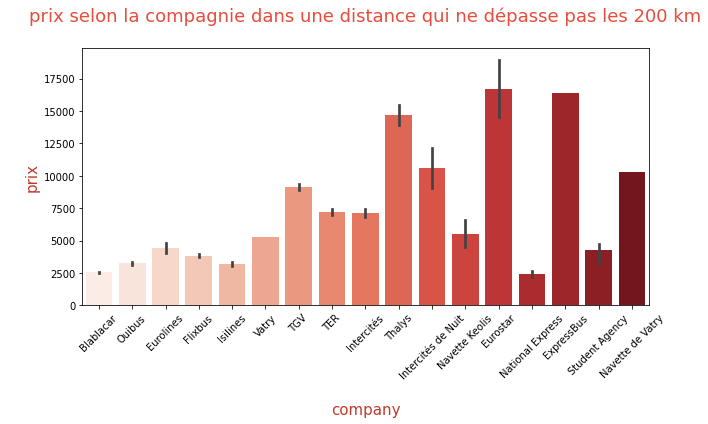

In [29]:
# nombre de compangies existantes pour faire ce voyages
dist_0_200
resultat = dist_0_200.fullname.value_counts()
print(resultat)



print(dist_0_200)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_0_200['fullname'], y=dist_0_200['price_in_cents'],palette='Reds')
plt.xlabel('\ncompany', fontsize=15, color='#c0392b')
plt.ylabel("\nprix", fontsize=15, color='#c0392b')
plt.title("prix selon la compagnie dans une distance qui ne dépasse pas les 200 km\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()


Blablacar             32689
TGV                    6945
Flixbus                5942
TER                    5590
Ouibus                 2812
Intercités             1692
Isilines               1219
Thalys                  681
Eurolines               605
Eurostar                402
Navette Keolis          131
National Express        117
Navette de Vatry         15
Vatry                    14
Deinbus.de                9
Intercités de Nuit        8
Eurolines UK              3
Student Agency            2
Globtour                  1
Name: fullname, dtype: int64
          id_x  company  ...  has_bicycle  transport_type
0      6795025     8385  ...        False      carpooling
1      6795030     8385  ...        False      carpooling
2      6795031     8385  ...        False      carpooling
3      6795032     8385  ...        False      carpooling
4      6795033     8385  ...        False      carpooling
...        ...      ...  ...          ...             ...
58872  6844369     8387  ...     

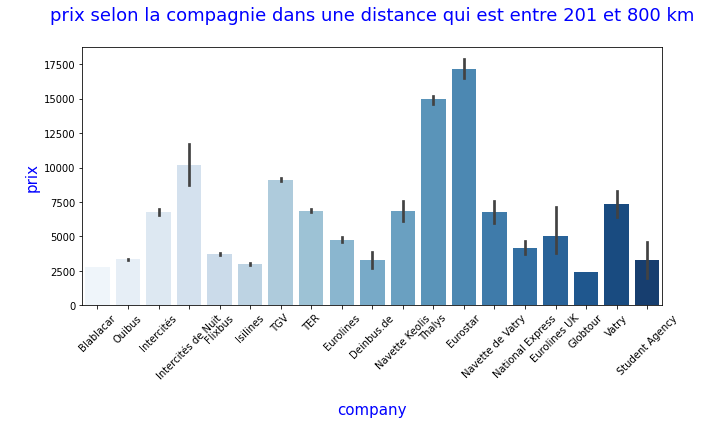

In [30]:
# nombre de compangies existantes pour faire ce voyages
dist_201_800
resultat = dist_201_800.fullname.value_counts()
print(resultat)



print(dist_201_800)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_201_800['fullname'], y=dist_201_800['price_in_cents'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#0000ff')
plt.ylabel("\nprix", fontsize=15, color='#0000ff')
plt.title("prix selon la compagnie dans une distance qui est entre 201 et 800 km\n", fontsize=18, color='#0000ff')
plt.xticks(rotation= 45)
plt.tight_layout()


Blablacar           771
TER                 192
TGV                 176
Flixbus             154
Intercités           80
Ouibus               78
Eurostar             42
Isilines             29
Thalys               18
Eurolines            15
Navette Keolis        9
National Express      2
Vatry                 1
Name: fullname, dtype: int64
         id_x  company  ...  has_bicycle  transport_type
0     6795448       13  ...        False             bus
1     6795449       13  ...        False             bus
2     6795450       13  ...        False             bus
3     6795452       13  ...        False             bus
4     6795453       13  ...        False             bus
...       ...      ...  ...          ...             ...
1562  6856406     8382  ...        False           train
1563  6856407     8382  ...        False           train
1564  6856408     8382  ...        False           train
1565  6861970       71  ...        False             bus
1566  6861971       71  ...     

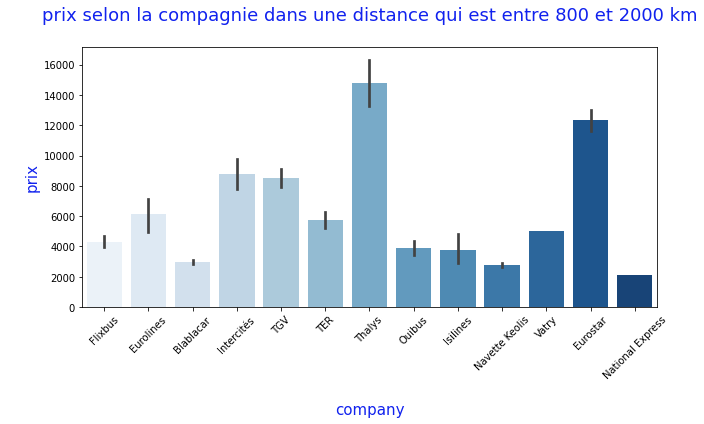

In [31]:
# nombre de compangies existantes pour faire ce voyages
dist_801_2000
resultat = dist_801_2000.fullname.value_counts()
print(resultat)



print(dist_801_2000)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_801_2000['fullname'], y=dist_801_2000['price_in_cents'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\nprix", fontsize=15, color='#1122ee')
plt.title("prix selon la compagnie dans une distance qui est entre 800 et 2000 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)
plt.tight_layout()


durée selon les compagnies 


0         3.333333
1         3.333333
2         3.666667
3         3.833333
4         3.833333
           ...    
13719    47.500000
13720    11.750000
13721    11.333333
13722     9.416667
13723    11.583333
Name: durée_en_seconde, Length: 13724, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

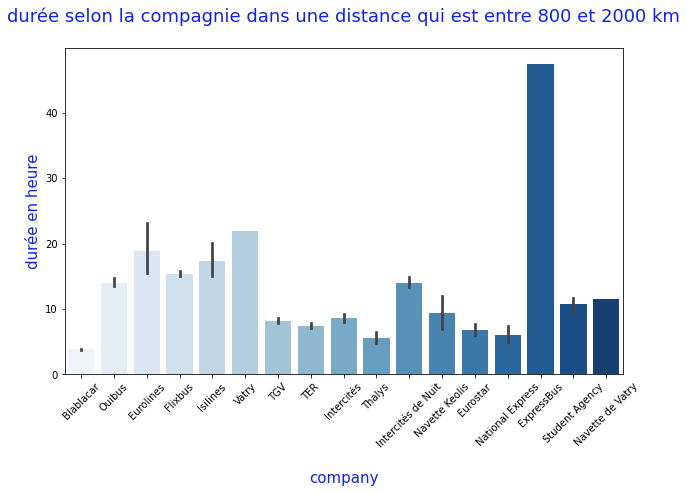

In [32]:
#la durée que prend un trajet selon la compagnies et selon la distance 

#distance entre 0 et 200
dist_0_200

a = dist_0_200['durée_en_seconde']/ 3600
print(a)
dist_0_200.insert(8,'durée_en_heure',a)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_0_200['fullname'], y=dist_0_200['durée_en_heure'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\ndurée en heure", fontsize=15, color='#1122ee')
plt.title("durée selon la compagnie dans une distance qui est entre 800 et 2000 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)



0         6.166667
1         3.000000
2         2.500000
3         2.500000
4         2.833333
           ...    
58872    26.750000
58873    27.250000
58874    26.750000
58875    14.250000
58876     9.916667
Name: durée_en_seconde, Length: 58877, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

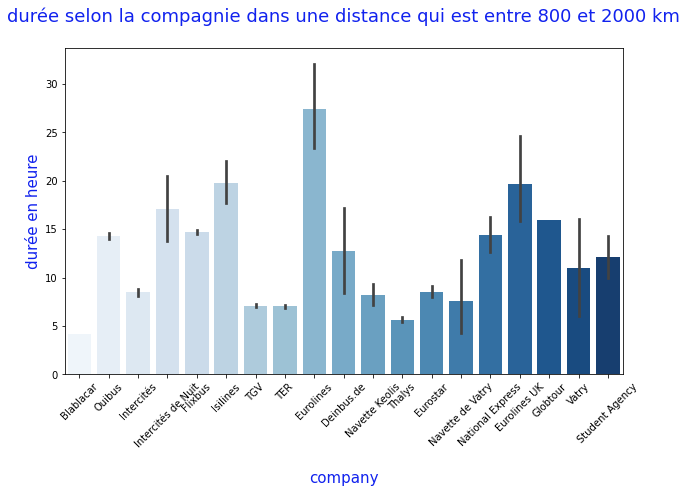

In [33]:
#distance entre 201 et 800

dist_201_800

a = dist_201_800['durée_en_seconde']/ 3600
print(a)
dist_201_800.insert(8,'durée_en_heure',a)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_201_800['fullname'], y=dist_201_800['durée_en_heure'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\ndurée en heure", fontsize=15, color='#1122ee')
plt.title("durée selon la compagnie dans une distance qui est entre 800 et 2000 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)


0       17.750000
1       18.666667
2       18.000000
3       20.500000
4       31.500000
          ...    
1562     4.133333
1563     3.666667
1564     3.616667
1565     3.166667
1566     3.116667
Name: durée_en_seconde, Length: 1567, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

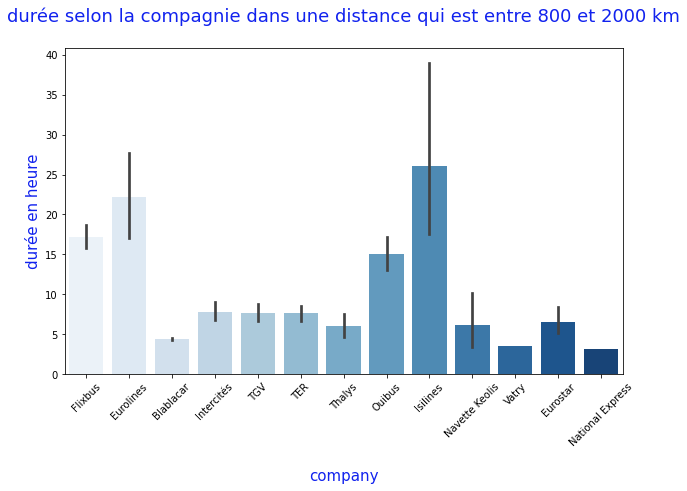

In [34]:

#distance entre 801 et 2000
dist_801_2000

a = dist_801_2000['durée_en_seconde']/ 3600
print(a)
dist_801_2000.insert(8,'durée_en_heure',a)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_801_2000['fullname'], y=dist_801_2000['durée_en_heure'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\ndurée en heure", fontsize=15, color='#1122ee')
plt.title("durée selon la compagnie dans une distance qui est entre 800 et 2000 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)

Prix selon la compagnie , le type de transport, la distance


          id_x  company  ...  has_bicycle  transport_type
32689  6795026        9  ...        False             bus
32690  6795076        9  ...        False             bus
32691  6795078        9  ...        False             bus
32692  6795079        9  ...        False             bus
32693  6795081        9  ...        False             bus
...        ...      ...  ...          ...             ...
58872  6844369     8387  ...          NaN             bus
58873  6844504     8387  ...          NaN             bus
58874  6844505     8387  ...          NaN             bus
58875  6852979       12  ...        False             bus
58876  6853589       12  ...        False             bus

[10870 rows x 25 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

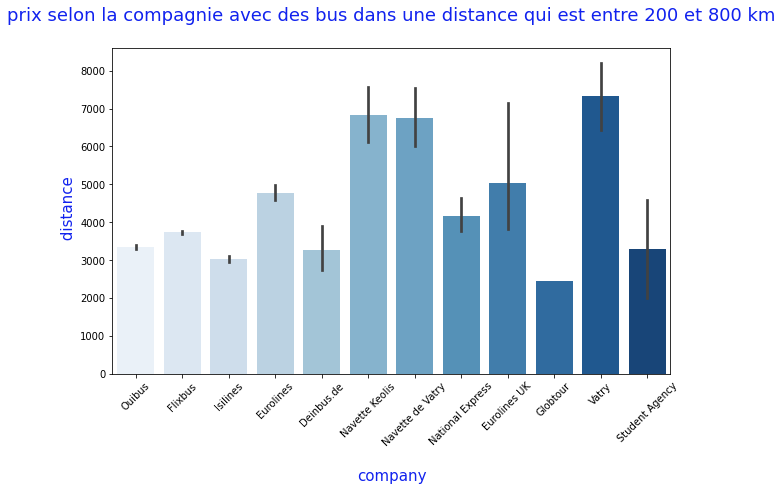

In [35]:
# prix selon le type de transport (ici c'est le bus)

#distance entre 201 et 801
print(dist_201_800_bus)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_201_800_bus['fullname'], y=dist_201_800_bus['price_in_cents'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\n distance", fontsize=15, color='#1122ee')
plt.title("prix selon la compagnie avec des bus dans une distance qui est entre 200 et 800 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)


          id_x  company  ...  has_bicycle  transport_type
35501  6795027     8377  ...        False           train
35502  6795028     8377  ...        False           train
35503  6795084     8377  ...        False           train
35504  6795087     8377  ...        False           train
35505  6795089     8377  ...        False           train
...        ...      ...  ...          ...             ...
58720  6865605     8382  ...        False           train
58721  6865606     8382  ...        False           train
58722  6865607     8382  ...        False           train
58723  6865608     8382  ...        False           train
58724  6865609     8382  ...        False           train

[15318 rows x 25 columns]


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

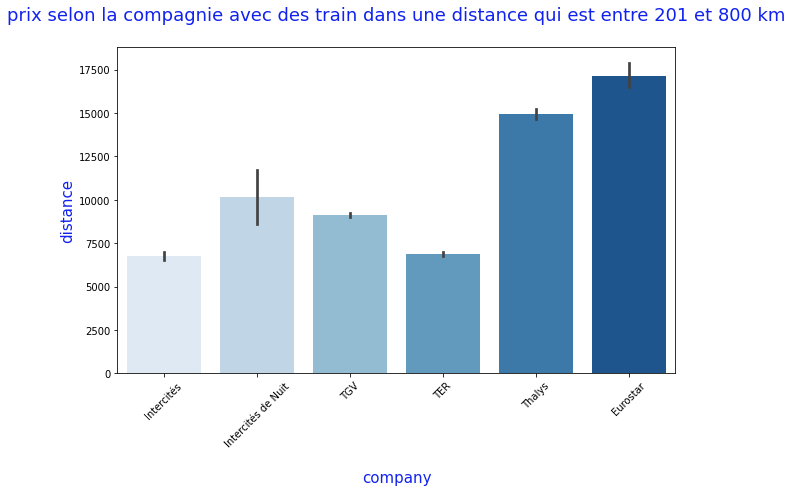

In [36]:
# prix selon le type de transport (ici c'est le bus)

#distance entre 201 et 801
print(dist_201_800_train)

# graphes
plt.figure(figsize=(10,6))
sns.barplot(x=dist_201_800_train['fullname'], y=dist_201_800_train['price_in_cents'],palette='Blues')
plt.xlabel('\ncompany', fontsize=15, color='#1122ee')
plt.ylabel("\ndistance", fontsize=15, color='#1122ee')
plt.title("prix selon la compagnie avec des train dans une distance qui est entre 201 et 800 km\n", fontsize=18, color='#1122ee')
plt.xticks(rotation= 45)

In [37]:
dist_0_200

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,durée,durée_en_heure,durée_en_seconde,search_ts,middle_stations,other_companies,o_city,d_city,distance,id_y,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795287,8385,NaN,NaN,2017-09-15 12:30:00+00,2017-09-15 15:50:00+00,2650,0 days 03:20:00,3.333333,12000.0,2017-10-01 07:19:44.151+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795292,8385,NaN,NaN,2017-09-15 13:10:00+00,2017-09-15 16:30:00+00,2900,0 days 03:20:00,3.333333,12000.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
2,6795297,8385,NaN,NaN,2017-09-15 13:30:00+00,2017-09-15 17:10:00+00,2650,0 days 03:40:00,3.666667,13200.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
3,6795303,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2500,0 days 03:50:00,3.833333,13800.0,2017-10-01 07:19:44.153+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
4,6795309,8385,NaN,NaN,2017-09-15 14:00:00+00,2017-09-15 17:50:00+00,2750,0 days 03:50:00,3.833333,13800.0,2017-10-01 07:19:44.154+00,NaN,NaN,628,697,80.957502,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,6842611,33,1525.0,279.0,2017-10-27 06:00:00+00,2017-10-29 05:30:00+00,16395,1 days 23:30:00,47.500000,171000.0,2017-10-12 21:41:02.9+00,"{1187,1187}",{13},162,628,133.946732,33,9,141,expressbus,ExpressBus,False,False,False,False,bus
13720,6848395,12,283.0,1595.0,2017-10-27 06:00:00+00,2017-10-27 17:45:00+00,4687,0 days 11:45:00,11.750000,42300.0,2017-10-14 19:01:07.915+00,"{561,8813}",{71},1061,1477,174.086084,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13721,6848396,12,283.0,1593.0,2017-10-27 06:00:00+00,2017-10-27 17:20:00+00,4777,0 days 11:20:00,11.333333,40800.0,2017-10-14 19:01:07.915+00,"{561,561}",{71},1061,1477,174.086084,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
13722,6856599,12,283.0,523.0,2017-11-03 18:30:00+00,2017-11-04 03:55:00+00,3300,0 days 09:25:00,9.416667,33900.0,2017-10-16 20:12:19.537+00,"{330,330}",{13},1061,809,154.167246,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus


Calculer les distance en utilisant mes stations et pas les villes

In [38]:

# on remarque que on a des ligner dont on a des valuers manquante en o_station et d_station
#suppression des valeurs manquantes 
df_no_na = df3.dropna(subset=['o_station', 'd_station'])


In [39]:
# construire une dataframe qui a la longitude et la latitude des stations de départ et d'arivée

#on fait avec les stations car en effet c'est plus exacte car un seule point (lat, long) pour representer ce n'est tout a fait précis 
# donc le calcul pour une stations c'est plus précis, un point (lat, long) peut bien representé cette derniére.
# mais bon l'écart n'est pas trés grand comme meme
# et puis faut juste importer les (lat, long) des stations 

#seulement colonnes o_city et d_city
colonnes = ['o_station','d_station']
df4 = df_no_na[colonnes]


a = ['latitude','longitude','id']
df5 = df1[a]
df5.columns=['o_latitude','o_longitude','id']

df6= df1[a]
df6.columns=['d_latitude','d_longitude','id']

df5 = pd.merge(df4,df5, left_on=['o_station'],right_on=['id']) 

#data frame finale 
df7 = pd.merge(df5,df6,left_on=['d_station'],right_on=['id'])
df7



,o_station,d_station,o_latitude,o_longitude,id_x,d_latitude,d_longitude,id_y
0,63.0,1044.0,47.896911,1.854277,63,43.583932,3.860233,1044
1,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
2,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
3,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
4,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
...,...,...,...,...,...,...,...,...
32722,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32723,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32724,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32725,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492


In [40]:
df7

,o_station,d_station,o_latitude,o_longitude,id_x,d_latitude,d_longitude,id_y
0,63.0,1044.0,47.896911,1.854277,63,43.583932,3.860233,1044
1,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
2,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
3,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
4,767.0,1044.0,48.727660,2.264629,767,43.583932,3.860233,1044
...,...,...,...,...,...,...,...,...
32722,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32723,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32724,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492
32725,2391.0,1492.0,51.359153,-0.190711,2391,50.836650,-0.136470,1492


In [41]:
o_lat = pd.to_numeric(df7['o_latitude'].astype(float))
o_lon = pd.to_numeric(df7['o_longitude'].astype(float) )
d_lat = pd.to_numeric(df7['d_latitude'].astype(float) )
d_lon = pd.to_numeric(df7['d_longitude'].astype(float))

vect_dist = distance(o_lat,d_lat,o_lon,d_lon)

print(vect_dist)




0        504.165333
1        584.974494
2        584.974494
3        584.974494
4        584.974494
            ...    
32722     58.222996
32723     58.222996
32724     58.222996
32725     58.222996
32726     58.222996
Length: 32727, dtype: float64
